In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib.gridspec import GridSpec

sns.set(style='ticks', palette="Set2")
sns.despine()

<Figure size 432x288 with 0 Axes>

In [2]:
def generic_velocity_prof(z, v0, a, alpha):
    '''
    generic volcano velocity model from Lesage et al (2018) in Section 5
    '''
    v_prof = v0 * ((z + a)**alpha - a**alpha + 1)
    
    return v_prof

In [3]:
dz = 101
depths = np.arange(35) * dz

v_p = generic_velocity_prof(depths, 540, 10, 0.315)
v_s = generic_velocity_prof(depths, 320, 15, 0.3)

In [4]:
depthsR = np.repeat(depths,2)[1:]
v_pR = np.repeat(v_p,2)[:-1]
v_sR = np.repeat(v_s,2)[:-1]

depthsB = np.arange(35, 55) * dz
v_pB = np.repeat(v_p[-1], len(depthsB))
v_sB = np.repeat(v_s[-1], len(depthsB))

depthsTOT = np.concatenate((depthsR, depthsB))
v_pTOT = np.concatenate((v_pR, v_pB))
v_sTOT = np.concatenate((v_sR, v_sB))


rho_s = (2500 + 93.75*(v_sTOT*1e-3 - 0.3))*1e-3

<IPython.core.display.Javascript object>


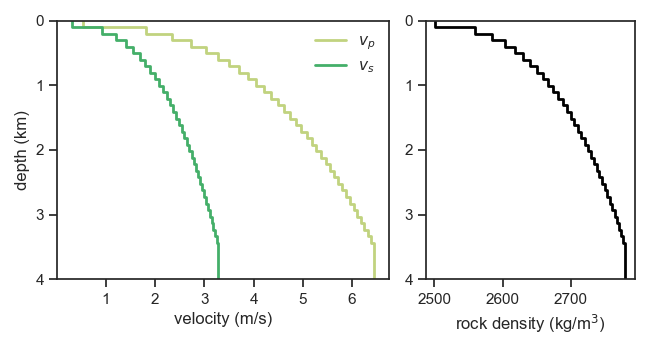

In [5]:
%matplotlib notebook

fig = plt.figure(figsize=(6.5, 3.5))

gs = GridSpec(1,5, figure=fig)
ax1 = fig.add_subplot(gs[0,0:3])
ax2 = fig.add_subplot(gs[0,3:], sharey = ax1)

ax1.plot(v_pTOT*1e-3, depthsTOT*1e-3, color='#C1D37F', linewidth=2, label='$v_p$')
ax1.plot(v_sTOT*1e-3, depthsTOT*1e-3,  color='#44AF69', linewidth=2, label='$v_s$')
ax1.legend(frameon=False)
ax1.set_ylim(4,0)
ax1.set_yticks([4, 3, 2, 1, 0])
ax1.set_ylabel('depth (km)')
ax1.set_xlabel('velocity (m/s)')

ax2.plot(rho_s*1e3, depthsTOT*1e-3, color='black', linewidth=2)
ax2.set_xlabel('rock density (kg/m$^3$)')

plt.tight_layout()
# plt.savefig('/Users/kcoppess/Desktop/gestrich/paper-figures/lesage-velocity-profile-Boore-Joyner-density-profile.png', dpi=300)
plt.show()

In [9]:
model = np.ones((35, 5))

model[:,0] = dz*1e-3
model[:,1] = v_s*1e-3
model[:,2] = v_p*1e-3
model[:,3] = rho_s[:35]
model[:,4] *= 30

fmt = '%1.3f %1.12f %1.12f %1.3f %1.f'
np.savetxt('lesageGeneric3535m_BooreJoyner', model, fmt=fmt)